In [131]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


##### Modelling

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV

from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings("ignore")

Import the CSV Data as Pandas Data Frame

In [132]:
df = pd.read_csv('data/StudentsPerformance.csv')

In [133]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Prepare X and Y Variables

In [134]:
x = df.drop(columns=['math score'], axis=1)
y = df['math score']

In [135]:
x['gender'].unique()

array(['female', 'male'], dtype=object)

In [136]:
x

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,99,95
996,male,group C,high school,free/reduced,none,55,55
997,female,group C,high school,free/reduced,completed,71,65
998,female,group D,some college,standard,completed,78,77


In [137]:
##### Create Column Transformer with 3 types of Transformers

num_features= x.select_dtypes(exclude=['object']).columns
category_features = x.select_dtypes(include=['object']).columns


from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, category_features),
        ("StandardScaler", numeric_transformer, num_features)
        
    ]
)

In [138]:
x = preprocessor.fit_transform(x)

In [139]:
############ Seperate dataset into train and test sets

X_train, X_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((800, 19), (200, 19), (800,), (200,))

Create an Evaluate Function to give all metrics after model Training

In [140]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    r2 = r2_score(true, predicted)
    return mae, mse,r2

In [141]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso Regression": Lasso(),
    "Ridge Regression": Ridge(),
    "KNN Regressor": KNeighborsRegressor(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "CatBoost Regressor": CatBoostRegressor(verbose=0),
    "XGBoost Regressor": XGBRegressor(eval_metric='rmse'),
    "Support Vector Regressor": SVR()
}

model_List = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    
    
    model.fit(X_train, y_train)    ######### train model 
    
    ##### Make predictions on train and test data
    y_train_pred = model.predict(X_train)  ######## make predictions on train data 
    y_test_pred = model.predict(X_test)  ######## make predictions
    
    
    ### Evaluate Train and Test Data Set
    model_train_mae, model_train_mse, model_train_r2 = evaluate_model(y_test, y_test_pred)
    
    print(list(models.keys())[i])    
    model_List.append(list(models.keys())[i])
  
    print('Model perfomance for Training Set')
    print("---- Root mean Squared Error :{:.4f}".format(model_train_mse))
    print("---- Mean Absoulte Error :{:.4f}".format(model_train_mae))
    print("---- R2 Score :{:.4f}".format(model_train_r2))
   
    
    print('----------------------------------------')
    r2_list.append(model_train_r2)
    
    print('='*35)
    print('\n')
  
  

Linear Regression
Model perfomance for Training Set
---- Root mean Squared Error :29.0952
---- Mean Absoulte Error :4.2148
---- R2 Score :0.8804
----------------------------------------


Lasso Regression
Model perfomance for Training Set
---- Root mean Squared Error :42.5064
---- Mean Absoulte Error :5.1579
---- R2 Score :0.8253
----------------------------------------


Ridge Regression
Model perfomance for Training Set
---- Root mean Squared Error :29.0563
---- Mean Absoulte Error :4.2111
---- R2 Score :0.8806
----------------------------------------


KNN Regressor
Model perfomance for Training Set
---- Root mean Squared Error :52.5538
---- Mean Absoulte Error :5.6090
---- R2 Score :0.7840
----------------------------------------


Decision Tree Regressor
Model perfomance for Training Set
---- Root mean Squared Error :59.1150
---- Mean Absoulte Error :6.0950
---- R2 Score :0.7571
----------------------------------------


Random Forest Regressor
Model perfomance for Training Set
--

In [142]:
pd.DataFrame({'Model': model_List, 'R2 Score': r2_list}).sort_values(by='R2 Score', ascending=False)

,Model,R2 Score
2,Ridge Regression,0.880593
0,Linear Regression,0.880433
5,Random Forest Regressor,0.852404
7,CatBoost Regressor,0.851632
6,AdaBoost Regressor,0.844092
8,XGBoost Regressor,0.827797
1,Lasso Regression,0.825320
3,KNN Regressor,0.784030
4,Decision Tree Regressor,0.757067
9,Support Vector Regressor,0.728600


Linear Regression Since its High interms of accuracy

In [ ]:
lin_model = LinearRegression(fit_intercept= True)

lin_model= lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)
print(f'R2 Score of Linear Regression Model: {score:.4f}')



R2 Score of Linear Regression Model: 0.8804


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

Plot y_pred and y_test

Text(0, 0.5, 'Predicted Values')

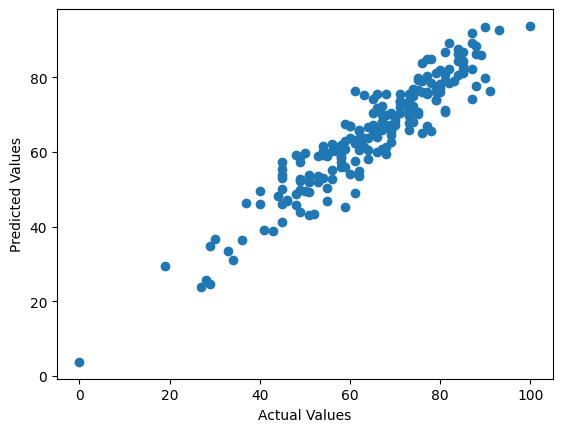

In [145]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values') 
plt.ylabel('Predicted Values')

<Axes: xlabel='math score'>

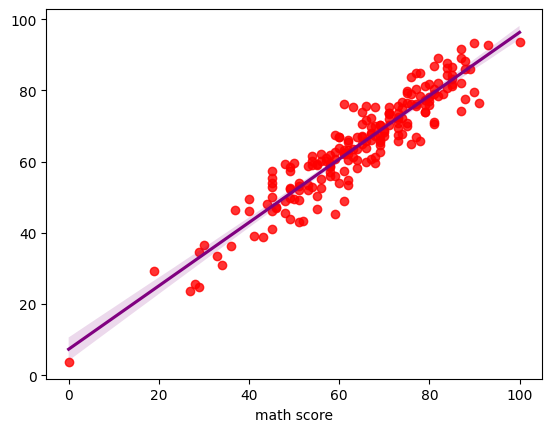

In [147]:
sns.regplot(x=y_test, y=y_pred, line_kws={"color": "purple"}, scatter_kws={"color": "red"})